Projeto feito durante o curso de Análise de dados da Data Science Academy 
- Fonte: https://www.datascienceacademy.com.br/
- Base de Dados: http://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [2]:
# Carregando dados
dados = pd.read_csv("dados/diabetic_data.csv")

In [3]:
dados.shape

(101766, 50)

In [4]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Limpeza e Transformação dos Dados

In [6]:
dados.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
# Checando as colunas com valor '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [8]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Criando lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o valor exclusivo for menor que 15, imprima valores
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
    



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

In [9]:
# Vamos verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')



Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


In [10]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 2), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.0 % do total


**Decisões:**

- 1- Variável weight é 96.86 % : o melhor é simplesmente ignorar a variável e removê-la.

- 2- Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.

- 3- Vamos remover os registros com "?" das demais variáveis.

- 4- Para a variável gender vamos remover os 3 registros com categoria "Unknown/Invalid".

In [11]:
# Removendo as 3 colunas
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [12]:
# Removendo os registros com baixo percentual de valores ausentes
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [13]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [14]:
dados.shape

(98052, 47)

In [15]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [16]:
# Checando se tem variáveis com um único valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


Vamos eliminar estas colunas com um único valor por não adicionar informações a análise

In [17]:
dados = dados.loc[:, dados.nunique() != 1]

In [18]:
dados.shape

(98052, 44)

## Engenharia de Atributos

### Ajustando a variável alvo

In [19]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [20]:
# Verificando distribuição de dados na variável target
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [21]:
# Antes de alterar, cria a cópia do dataset
dados_clean1 = dados

In [22]:
# Ajustando a variável alvo

# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta

dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

In [23]:
# Verifica os valores únicos
dados['readmitted'].unique()

array([1, 0])

In [24]:
# Checa o tipo de dado
dados['readmitted'].dtype

dtype('int64')

In [25]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [26]:
# Verifica a proporção de cada classe
round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

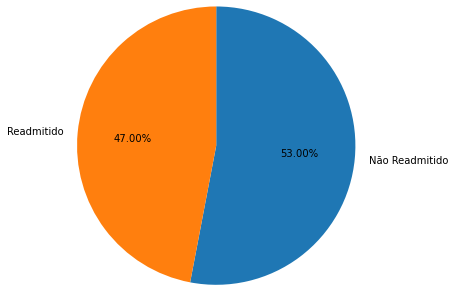

In [28]:
# Percentual de cada valor da variável alvo
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Não Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.00,0.00],
        startangle = 90,
        shadow = False,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

### Recategorização de Variável

#### Variável idade

In [29]:
dados.age.dtype

dtype('O')

In [30]:
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

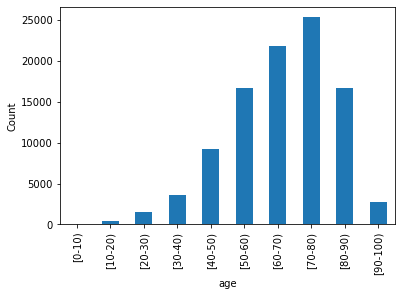

In [31]:
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

> Devido a existência de várias faixas de idades, serão simplificadas para um menor número para auxílio da avaliação do risco

In [32]:
# Recategorização para uma distribuição mais uniforme

# Classificando pela faixa 0-50
dados['age'] = pd.Series(['[0-50]' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                        for val in dados['age']], index = dados.index)

# Acima de 80 anos = 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

In [33]:
dados.age.dtype

dtype('O')

Text(0, 0.5, 'Count')

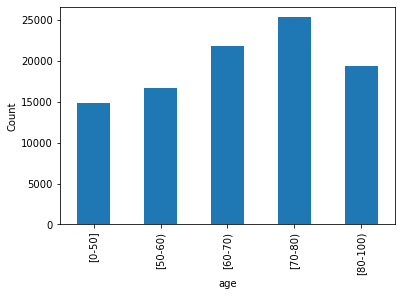

In [34]:
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

#### Variáveis do tipo ID

- Variável admision_type_id

In [35]:
dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7])

In [36]:
dados.admission_type_id.nunique()

8

In [37]:
# Reduzindo para 2 níveis
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                       for val in dados['admission_type_id']], index = dados.index)

In [38]:
dados.admission_type_id.nunique()

2

In [39]:
dados.admission_type_id.value_counts()

Emergencia    52178
Outro         45874
Name: admission_type_id, dtype: int64

- Variável discharge_disposition_id

In [40]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [41]:
dados.discharge_disposition_id.nunique()

26

In [42]:
# Reduzindo para 2 níveis
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro' 
                                              for val in dados['discharge_disposition_id']], index = dados.index)

In [43]:
dados.discharge_disposition_id.nunique()

2

In [44]:
dados.discharge_disposition_id.value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

- Variável admission_source_id

In [45]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [46]:
dados.admission_source_id.nunique()

17

In [47]:
# Reduziremos os níveis de 'admission_source_id' para três categorias
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro' 
                                              for val in dados['admission_source_id']], index = dados.index)

In [48]:
dados.admission_source_id.nunique()

3

In [49]:
dados.admission_source_id.value_counts()

Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: admission_source_id, dtype: int64

- Variáveis 'diag_1', 'diag_2' e 'diag_3' 

In [50]:
# Concatena 3 variáveis em um dataframe
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [51]:
# Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [52]:
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

#### Calculando a Comorbidade

In [53]:
# Para aplicar expressões regulares para buscar por um padrão e por isso precisamos do pacote re
import re

In [55]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [56]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

CPU times: user 9.79 s, sys: 8.32 ms, total: 9.79 s
Wall time: 9.81 s


In [57]:
# Shape
dados.shape

(98052, 45)

In [58]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [59]:
# Valores únicos
dados['comorbidade'].unique()

array([1, 3, 2, 0])

In [60]:
# Valores únicos contagem
dados['comorbidade'].value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

In [61]:
# Drop das variáveis individuais
dados.drop(['diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [62]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


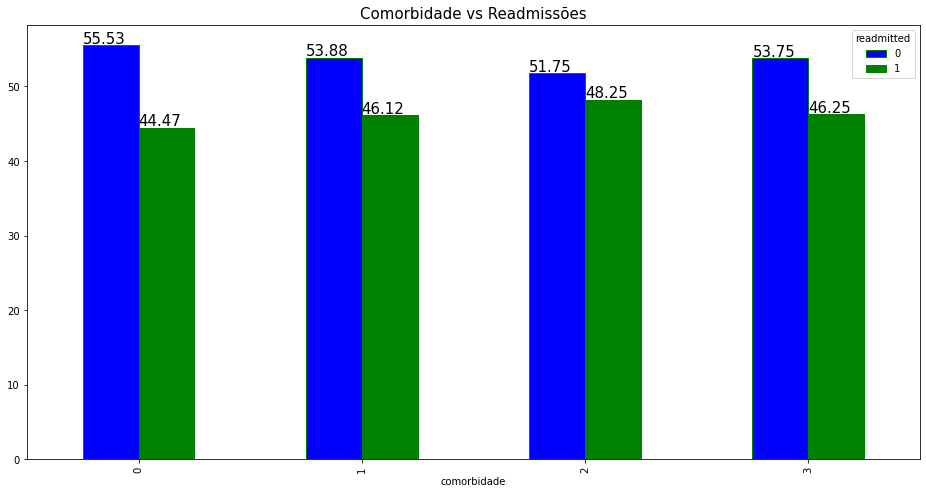

In [63]:
# Plot

# Prepara a figura a partir dos dados
fig = percent_com.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['b','g'])

# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

In [ ]:
# Legenda do gráfico:

# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
# forma simultânea no paciente

#### Variáveis de Dosagem de Medicamentos e Agrupamento de Variáveis

In [64]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


Text(0, 0.5, 'Count')

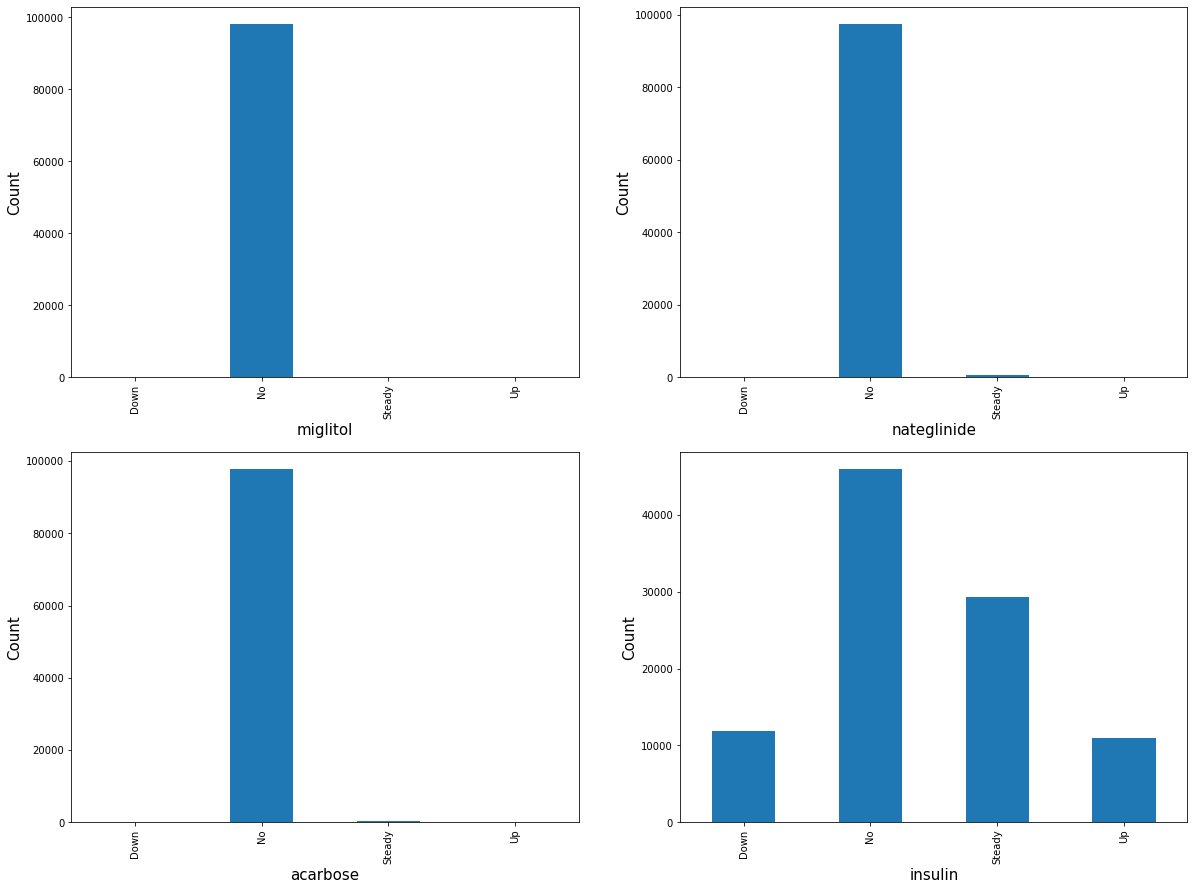

In [65]:
# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [66]:
# Shape
dados.shape

(98052, 42)

In [67]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [68]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [69]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [70]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Cria uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [72]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [73]:
# Verifica o total por modificações na dosagem de medicamentos
dados.num_alt_dosagem_med.value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

In [74]:
# Alterar o valor das colunas dos medicamentos para refletir se 
# esse medicamento está sendo administrado a um paciente ou não
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1) 

In [75]:
# Cria colina para ver quantos medicamentos estão sendo administrados ao paciente
dados['num_med'] = 0

In [76]:
# Carregamos a nova variável
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [77]:
# Verifica o total de medicamentos
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [78]:
# Remove as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [79]:
# Shape
dados.shape

(98052, 24)

In [80]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,None,None,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,None,None,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,No,Yes,1,3,0,1


In [81]:
# Variáveis
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

### Variáveis Categóricas

In [82]:
dados['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [83]:
dados['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [84]:
dados['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [85]:
# Recoding de variáveis categóricas binárias
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

> Reduziremos o resultado do teste A1C e o resultado do teste sérico de glicose em categorias de Normal, Anormal e Não Testado, com valores 1, 0 e -99, respectivamente.

In [86]:
dados['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [87]:
dados['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [88]:
# Recoding de variáveis categóricas (label encoding)
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

In [89]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [90]:
# Removendo duplicidades por id de paciente, mantendo o primeiro registro
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [91]:
# Shape
dados.shape

(68629, 24)

In [92]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [93]:
# Salvando o dataset
dados.to_csv('dados/dados_parte1.csv', index = False)

## Análise Exploratória

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Carregando os dados
dados = pd.read_csv("dados/dados_parte1.csv")

####  Total de Medicamentos Consumidos Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

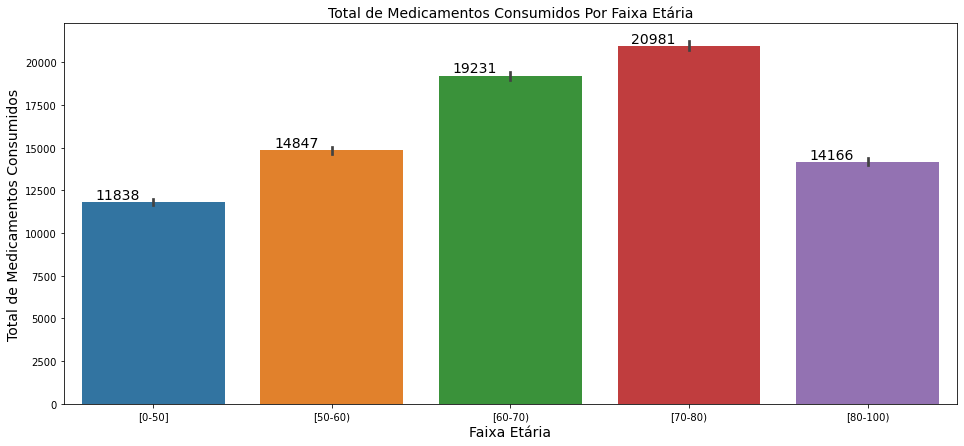

In [97]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### Total de Readmissões de Pacientes Diabéticos Por Gênero

> Pacientes do feminino têm número maior de readmissões.

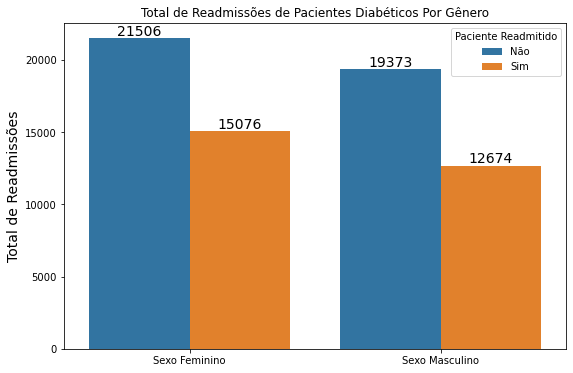

In [99]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

# Tamanho da figura em polegadas
figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### Total de Readmissões de Pacientes Por Faixa Etária

> Pacientes entre a faixa de 70-80 é a que tem o maior número de readmissões

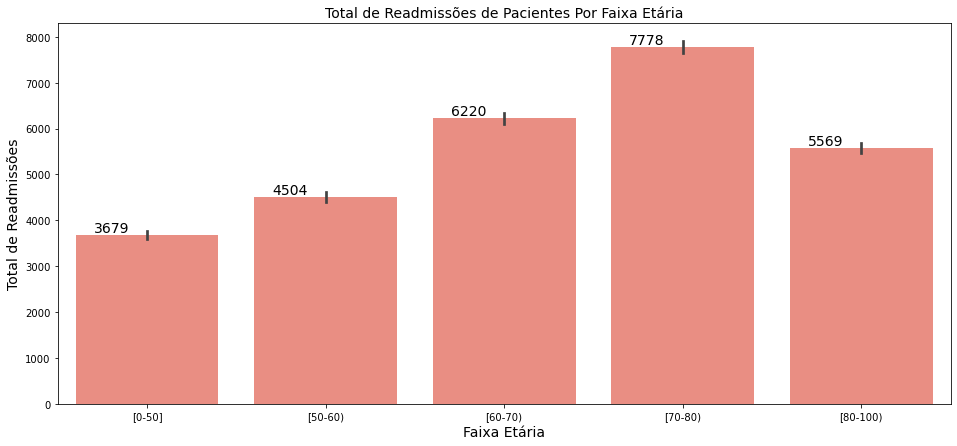

In [101]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras 
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

In [102]:
dados['readmitted'].value_counts()

0    40879
1    27750
Name: readmitted, dtype: int64

#### Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

> A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual

In [104]:
# Primeiro calculamos os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50],64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


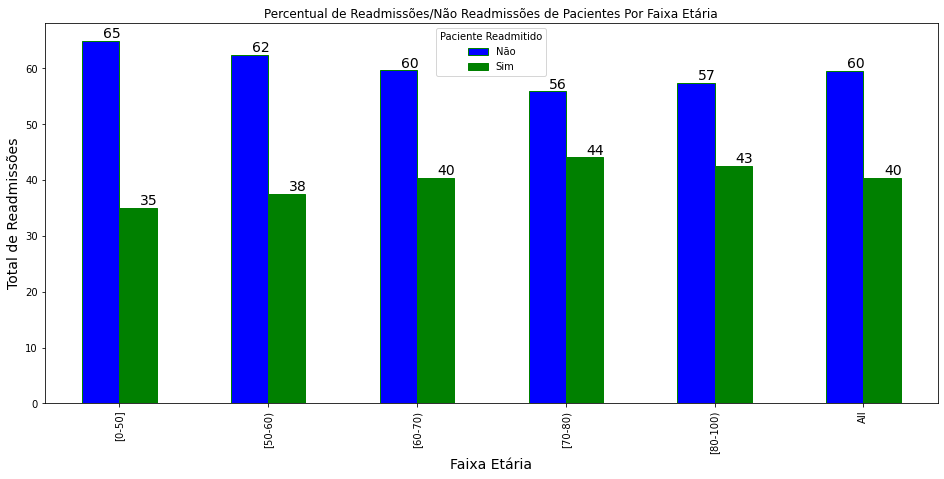

In [106]:
# Cria o gráfico
# Chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['b', 'g'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Mostra o gráfico
plt.show()

#### Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

> Mulheres na faixa etária de 70-80 anos tem um número maior de readmissões por emergência

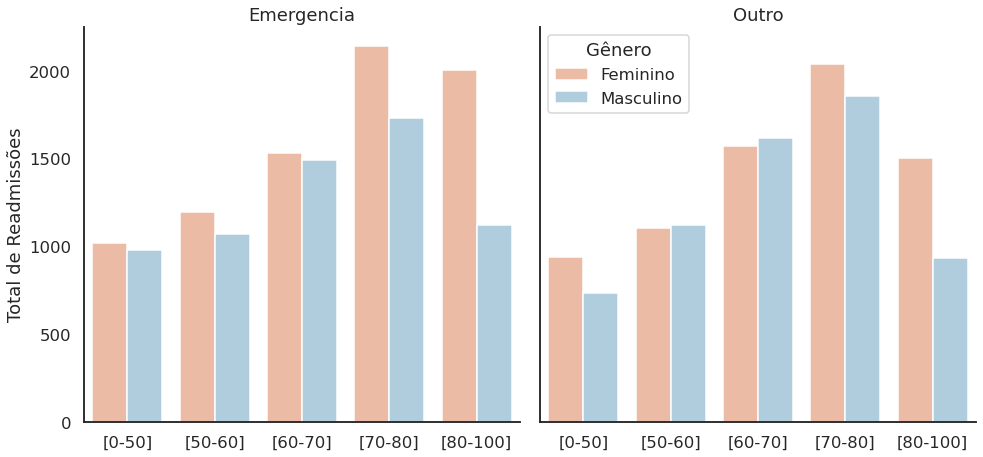

In [107]:
# Vamos incluir o background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

# Mostra o gráfico
plt.show(g)

#### Total de Readmissões/Não Readmissões Por Gênero e Por Raça

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas.

In [109]:
# Valores únicos de raça
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [110]:
# Cria um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [111]:
# Faz o mapeamento de 0 e 1 para labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

In [112]:
df_temp['readmitted'].head(10)

0        Readmitido
1    Não Readmitido
2    Não Readmitido
3    Não Readmitido
4        Readmitido
5    Não Readmitido
6        Readmitido
7    Não Readmitido
8    Não Readmitido
9        Readmitido
Name: readmitted, dtype: object

In [113]:
df_temp.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,Readmitido,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,Não Readmitido,1,0,1
2,500364,82442376,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,Não Readmitido,3,1,1
3,16680,42519267,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,Não Readmitido,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,Readmitido,3,0,1
5,55842,84259809,Caucasian,1,[60-70),Outro,Casa,Outro,4,70,...,0,7,-99,-99,1,1,Não Readmitido,2,0,3
6,63768,114882984,Caucasian,1,[70-80),Emergencia,Casa,Sala_Emergencia,5,73,...,0,8,-99,-99,0,1,Readmitido,3,0,1
7,12522,48330783,Caucasian,0,[80-100),Outro,Casa,Outro,13,68,...,0,8,-99,-99,1,1,Não Readmitido,2,0,2
8,15738,63555939,Caucasian,0,[80-100),Outro,Outro,Outro,12,33,...,0,8,-99,-99,1,1,Não Readmitido,2,0,2
9,28236,89869032,AfricanAmerican,0,[0-50],Emergencia,Casa,Sala_Emergencia,9,47,...,0,9,-99,-99,0,1,Readmitido,3,0,1


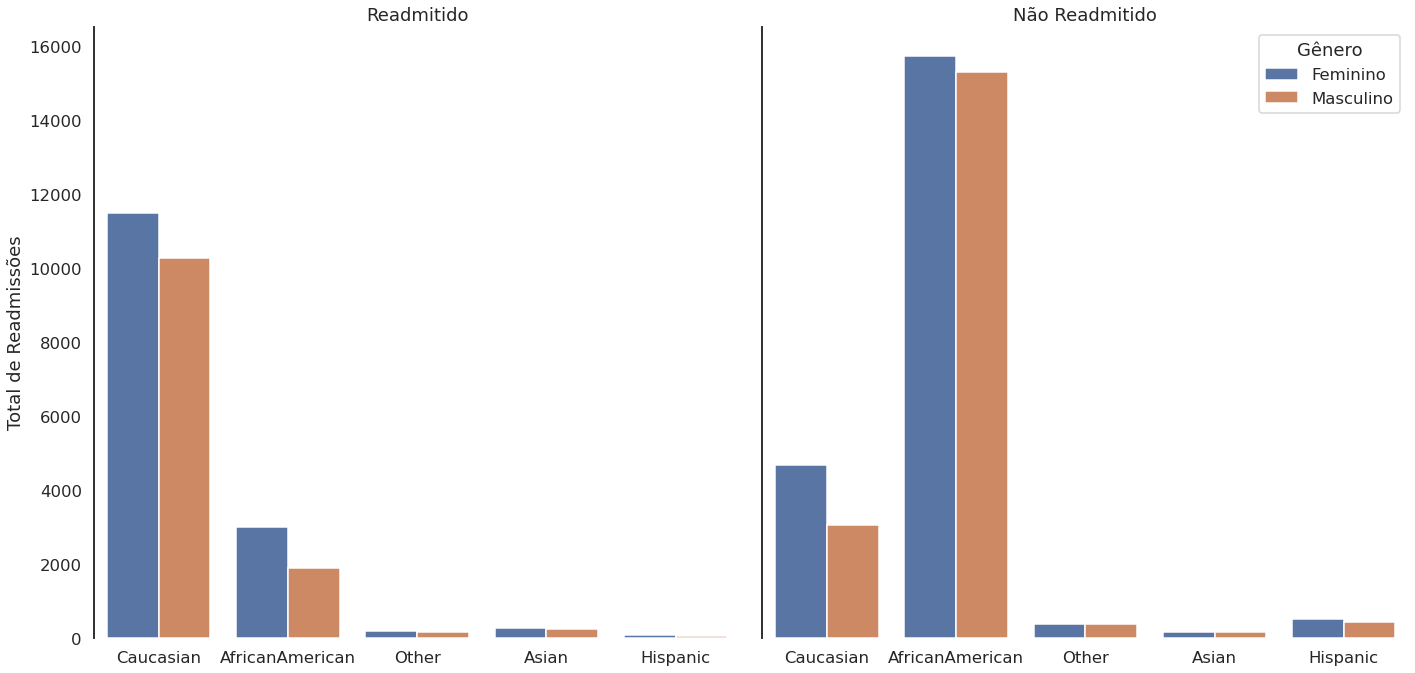

In [114]:
# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma função para personalizar a quantidade de parâmetros
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

#### Número de Visitas x Comorbidade

> Pacientes com comorbidade tem o maior número de visitas.

In [115]:
# Criamos a tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

In [116]:
# Tipo
type(num_visitas_comorbidade)

pandas.core.series.Series

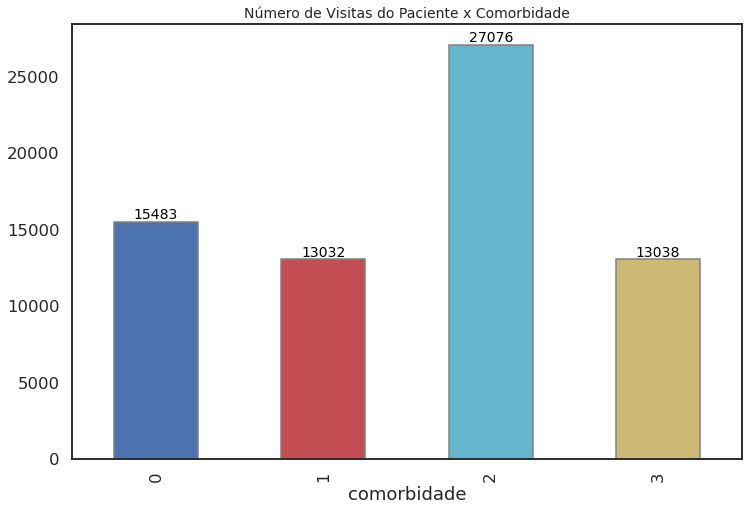

In [122]:
# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

# Cria o gráfico
fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'gray', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)

# Mostra o gráfico
plt.show()

#### Proporção de Readmissões Pelo Número de Visitas Antes da Alta

> Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

In [123]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


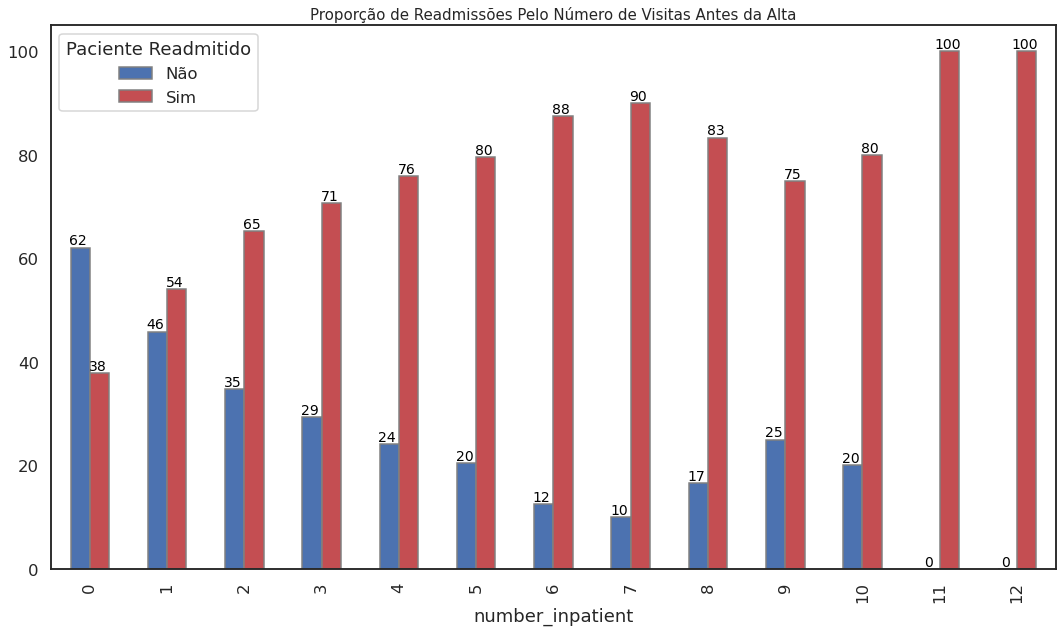

In [124]:
# Cria o gráfico
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'gray', color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

# Legenda
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Mostra o gráfico
plt.show()

## Gráficos Estatísticos

<AxesSubplot:xlabel='Número de Medicamentos Consumidos', ylabel='Density'>

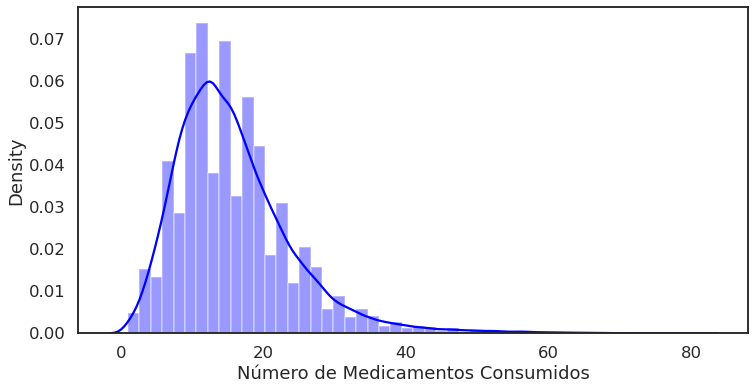

In [125]:
# Tamanho da figura
plt.figure(figsize = (12,6))

# Cria o gráfico
sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")

In [126]:
# Estatísticas
dados['num_medications'].describe()

count    68629.000000
mean        15.806481
std          8.289790
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

<AxesSubplot:xlabel='num_medications'>

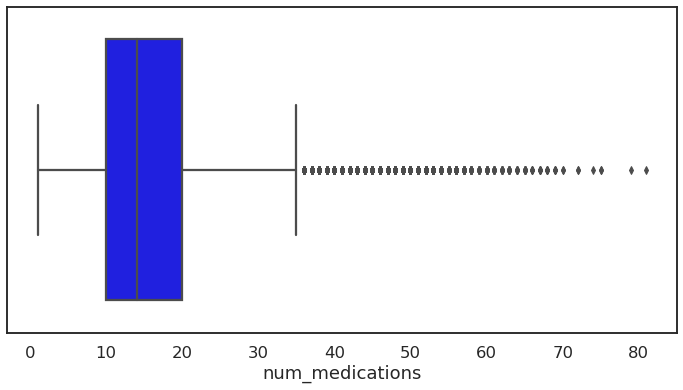

In [127]:
# Tamanho da figura
plt.figure(figsize = (12,6))

# Cria o gráfico
sns.boxplot(dados['num_medications'], color = 'Blue')

#### Stacked Histogramas

<AxesSubplot:ylabel='Frequency'>

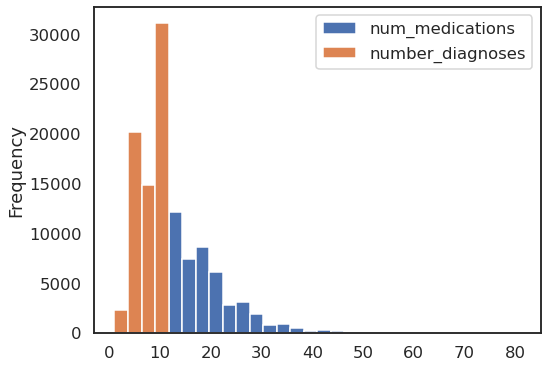

In [128]:
# Dois histogramas para duas variáveis no mesmo gráfico
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6))

#### Histogramas da Mesma Variável Por Diferentes Classes


array([<AxesSubplot:title={'center':'Não Readmitido'}>,
       <AxesSubplot:title={'center':'Readmitido'}>], dtype=object)

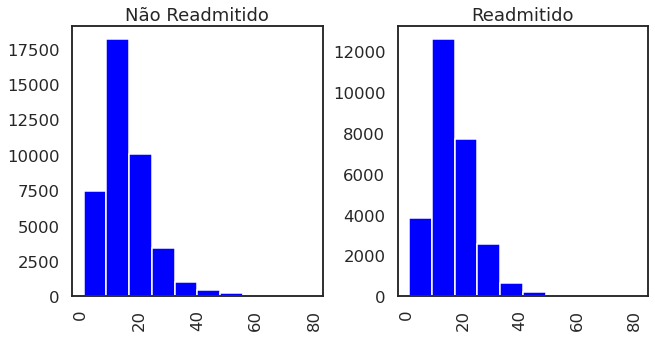

In [129]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Blue')

#### Comportamento do Paciente Por Procedimentos Clínicos

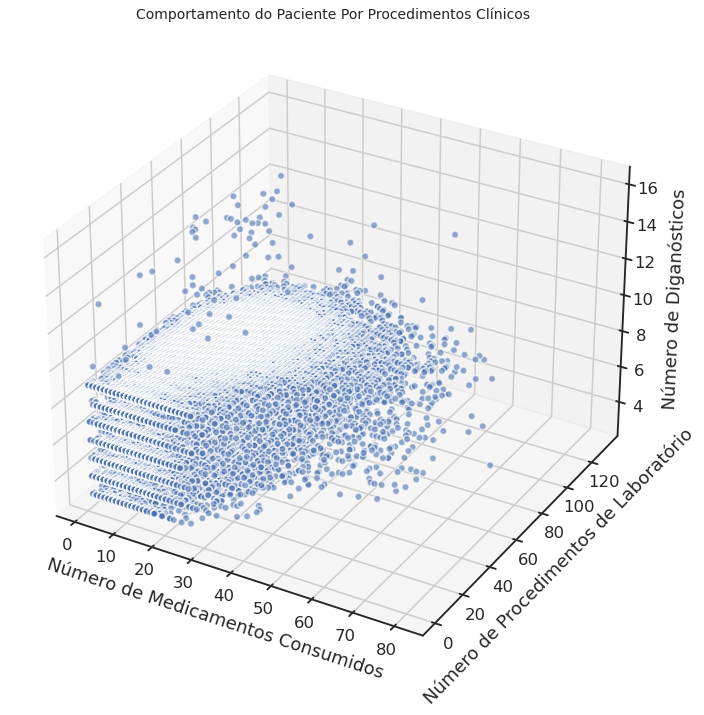

In [130]:
# Projeção 3D

# Tamanho da figura
fig = plt.figure(figsize = (14, 12))

# Subplots
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

# Gráfico de pontos
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nNúmero de Medicamentos Consumidos')
ax.set_ylabel('\nNúmero de Procedimentos de Laboratório')
ax.set_zlabel('\nNúmero de Diganósticos')

# Título
plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)

# Mostra o gráfico
plt.show()

# Fim